In [1]:
import os, glob, datetime, data as data, model as model
import matplotlib.pyplot as pyp
import numpy as np
import PIL as pil
from scipy import stats
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback, LearningRateScheduler
import tensorflow as tf


In [2]:
#%% script setup
redoMover=False #if you want to unpackage the files from their source again
train=False #if you want to resume training
new=False   #if you want to start from a random initial parameter model
sourceparam=''

batch_size=1 #batch size is number of images predicted per training step. best at 1 per literature

#get to root directory
os.chdir('..')
home=os.getcwd()

In [3]:
#%% Check for data.mat and download if needed
os.chdir('src')
import setup #used to download data.mat if needed 

In [7]:
#%% Check if data has been unloaded
os.chdir(home)
dataCheck=glob.glob('data/test/gt/*.npy')
if len(dataCheck)==0 or redoMover:
    os.chdir('src')
    import mover #used to download data if needed 

os.chdir(home)
batch_size=1



#define date string. use if making many models in short period of time
date = datetime.datetime.now().strftime("%m%d%Y_%H%M%S")
#define save name for model
mNameOld=r'saved models/final_resampled_3-22-2020.hdf5'


#set up training and validation dataset generators. see data.py.
print('Setting up dataset use...')
generator = data.trainGenerator(batch_size,train_path='data\\train'+sourceparam,image_folder='image',gt_folder='label',subset='training')
mName='new_model.hdf5'
mName=r'saved models/'+mName
valGen=data.valGenerator(sourceparam)

/Users/alimokh/GitHub/AxoNet/src


FileNotFoundError: [Errno 2] No such file or directory: '/Users/alimokh/GitHub/AxoNet/src/data/data_updated_3-22-2020.mat'

In [10]:
import mover

/Users/alimokh/GitHub/AxoNet
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Mar 22 16:26:58 2020', '__version__': '1.0', '__globals__': [], 'annotations': array([[array([[[0.        , 0.        , 0.00054284, 0.00054284],
                [0.        , 0.        , 0.00059156, 0.00059156],
                [0.        , 0.        , 0.00063465, 0.00063465],
                ...,
                [0.00063465, 0.00078983, 0.00138619, 0.00138619],
                [0.00053027, 0.00065993, 0.00123291, 0.00123291],
                [0.00043619, 0.00054284, 0.00107957, 0.00107957]],

               [[0.        , 0.        , 0.00065993, 0.00065993],
                [0.        , 0.        , 0.00071915, 0.00071915],
                [0.        , 0.        , 0.00077153, 0.00077153],
                ...,
                [0.00071355, 0.00086071, 0.00151059, 0.00151059],
                [0.00059619, 0.00071915, 0.00134355, 0.00134355],
                [0.00049042, 0.00059156, 0.001176

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alimokh/GitHub/AxoNet/data/all'

In [4]:
/Users/alimokh/GitHub/AxoNet/data/data_updated_3-22-2020.mat

__pycache__/    main.py         model.py        serve_model.py
data.py         main2.ipynb     mover.py        setup.py


In [52]:
import setup
fileId = '19Lu6DmfuasfeEDde1IkdtxrHvloWdBF8'
dest= '\data\data_updated_3-22-2020.mat'
setup.download_file_from_google_drive(fileId, dest)

In [46]:
from scipy.io import loadmat

In [53]:
x=loadmat('data_updated_3-22-2020.mat')

ValueError: Unknown mat file type, version 69, 114

In [54]:
ls

data_updated_3-22-2020.mat
final results- comparison with both nhp and rat.xlsx
full_name_divisions.txt
nerveIDs_forcode.xlsx
randvec.txt
rearrangeList.txt


In [11]:
import czifile
import czifile
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
img = czifile.imread('C22_rat11_M.czi')


In [13]:
print(img.shape)

(1, 1, 1, 3996, 7783, 1)


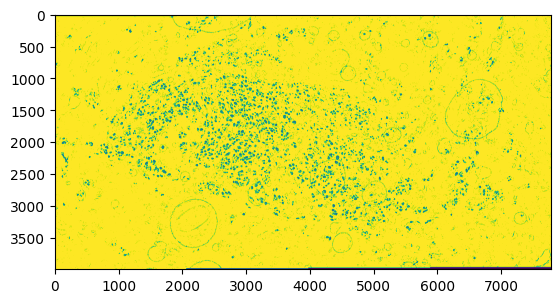

In [17]:
channels = []
for channel in range(1):
    channel_raster = img[0,0,channel,:,:,0]
    channels.append(channel_raster)
arr = np.stack(channels, axis=2)
plt.imshow(arr)

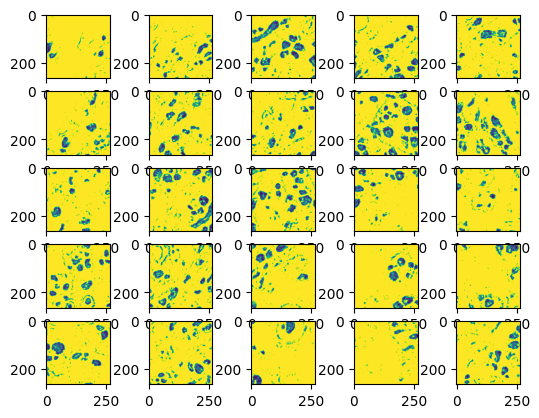

In [20]:
nb_photo = 5
photo_dim= 265
start = [1000,1000]
fig, axs = plt.subplots(nb_photo, nb_photo)
for i in range(nb_photo):
    for j in range(nb_photo):
        arr = img[0,0,channel,start[0]+i*photo_dim:start[0]+(i+1)*photo_dim,start[1]+j*photo_dim:start[1]+(j+1)*photo_dim,0]
        axs[i, j].imshow(arr)
        